In [1]:
import numpy as np
import matplotlib.pyplot as plt

#set a random seed for reproducibility
np.random.seed(42)

#Geerata a simple linear dataset
n_samples = 30
X_input = np.linspace(0 , 10 , n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples) 

#Add three impactful outliers
X_input = np.append(X_input , [15 , 18 , 20 ])
y = np.append(y , [80 , 90 , 100])

In [2]:
#Add the intercept 
X = np.hstack([np.ones((n_samples + 3 , 1)) , X_input.reshape(-1 , 1)])

#Compute the OLS and the Ridge regression solutions
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y
lambda_ridge = 1000 
I = np.eye(X.shape[1])
beta_ridge = np.linalg.inv(X.T @ X + lambda_ridge * I ) @ X.T @ y

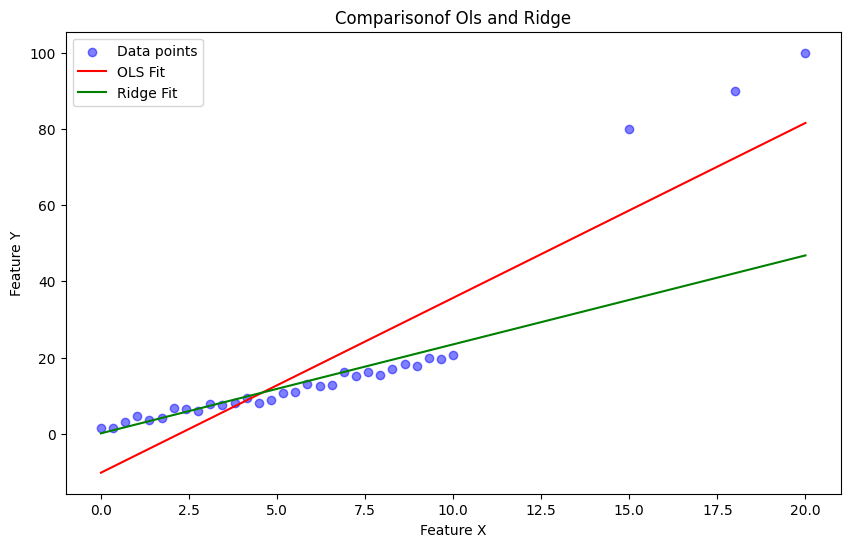

In [4]:
#plot
plt.figure(figsize= (10 , 6))
plt.scatter(X_input , y , color = 'blue' , alpha = 0.5 , label = 'Data points')

#OLS 
x_range = np.linspace(np.min(X_input) , np.max(X_input) , 100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range , y_OLS , 'r-' , label  = 'OLS Fit')


#ridge
y_ridge = beta_ridge[0] + beta_ridge[1] * x_range
plt.plot(x_range, y_ridge , 'g-' , label = 'Ridge Fit')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Comparisonof Ols and Ridge')
plt.legend()
plt.show()